# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
sinasc_1 = sinasc_raw[['munResAlt', 'munResArea','munResLat']]
sinasc_1.head()

,munResAlt,munResArea,munResLat
0,338.0,7067.025,-11.93554
1,338.0,7067.025,-11.93554
2,338.0,7067.025,-11.93554
3,397.0,3958.273,-12.13178
4,338.0,7067.025,-11.93554


In [10]:
# Reescrevendo o exercicio: Use groupby para criar duas faixas de latitudes (uma acima e outra abaixo de -10.5) com a coluna munResLat como índice. Realize as operações...

# Adicionando uma nova coluna faixa_lat e aplicando uma regra para separar as latitudes
sinasc_1['faixas'] = sinasc_1['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')


C:\Users\Felipe\AppData\Local\Temp\ipykernel_14456\2932402852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1['faixas'] = sinasc_1['munResLat'].apply(lambda x: 'Acima de -10.5' if x > -10.5 else 'Abaixo de -10.5')


In [11]:
# Agrupando pela nova faixa de latitude e realizando as operações
tarefa_1 = sinasc_1.groupby('faixas').agg({
    'munResAlt': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'munResArea': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
tarefa_1


munResAlt                                               \
                       sum        mean    min    max median         std   
faixas                                                                    
Abaixo de -10.5  3310445.0  254.786808  133.0  595.0  191.0  139.771518   
Acima de -10.5   1530415.0  109.050520   85.0  192.0   87.0   30.071422   

                                 munResArea                                    \
                          var           sum          mean      min        max   
faixas                                                                          
Abaixo de -10.5  19536.077237  8.360143e+07   6434.344207  459.978  24855.724   
Acima de -10.5     904.290400  3.137711e+08  22357.926110  965.676  34096.394   

                                                        
                    median           std           var  
faixas                                                  
Abaixo de -10.5   5067.384   5688.822159  3.236270e+07  
Acima de -10.5   34096.394  14488.909375  2.099285e+08

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [13]:
sinasc_2 = sinasc_raw[['munResArea','APGAR5', 'NATURALMAE']]

In [14]:
sinasc_2

,munResArea,APGAR5,NATURALMAE
0,7067.025,10.0,811.0
1,7067.025,9.0,811.0
2,7067.025,10.0,841.0
3,3958.273,10.0,841.0
4,7067.025,10.0,811.0
...,...,...,...
27023,11518.915,9.0,825.0
27024,5126.723,9.0,811.0
27025,11518.915,10.0,811.0
27026,11518.915,9.0,811.0


In [15]:
# Adicionando uma nova coluna faixas e aplicando uma regra para separar a área
sinasc_2['faixas'] = sinasc_2['munResArea'].apply(lambda x: 'Acima de 3000' if x > -3000 else 'Abaixo de 3000')
sinasc_2['faixas']

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14456\1390214605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2['faixas'] = sinasc_2['munResArea'].apply(lambda x: 'Acima de 3000' if x > -3000 else 'Abaixo de 3000')


0        Acima de 3000
1        Acima de 3000
2        Acima de 3000
3        Acima de 3000
4        Acima de 3000
             ...      
27023    Acima de 3000
27024    Acima de 3000
27025    Acima de 3000
27026    Acima de 3000
27027    Acima de 3000
Name: faixas, Length: 27028, dtype: object

In [16]:
tarefa_2 = sinasc_2.groupby('faixas').agg({
    'APGAR5': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'NATURALMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
tarefa_2

APGAR5                                                    \
                     sum       mean   min   max median       std       var   
faixas                                                                       
Abaixo de 3000      10.0  10.000000  10.0  10.0   10.0       NaN       NaN   
Acima de 3000   247139.0   9.179134   0.0  10.0    9.0  0.790573  0.625006   

                NATURALMAE                                             \
                       sum        mean    min    max median       std   
faixas                                                                  
Abaixo de 3000         0.0         NaN    NaN    NaN    NaN       NaN   
Acima de 3000   21782780.0  814.918818  811.0  853.0  811.0  9.892395   

                           
                      var  
faixas                     
Abaixo de 3000        NaN  
Acima de 3000   97.859472

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
print(sinasc_raw['munResAlt'].min())
print(sinasc_raw['munResAlt'].max())

85.0
595.0


In [19]:
# média 
85.0 + 595.0 / 2

382.5

In [20]:
sinasc_4 = sinasc_raw[['munResAlt']]

In [21]:
# Adicionando uma nova coluna faixa_lat e aplicando uma regra para separar a média
sinasc_4['faixas'] = sinasc_4['munResAlt'].apply(lambda x: 'Acima da média' if x > 382 else ' Abaixo da média')
sinasc_4['faixas']

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14456\3540344841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['faixas'] = sinasc_4['munResAlt'].apply(lambda x: 'Acima da média' if x > 382 else ' Abaixo da média')


0         Abaixo da média
1         Abaixo da média
2         Abaixo da média
3          Acima da média
4         Abaixo da média
               ...       
27023      Acima da média
27024     Abaixo da média
27025      Acima da média
27026      Acima da média
27027     Abaixo da média
Name: faixas, Length: 27028, dtype: object

In [22]:
tarefa_3 = sinasc_4.groupby('faixas').agg({'sum', 'mean', 'min', 'max', 'median', 'std', 'var'})
tarefa_3

munResAlt                                                \
                        sum    max        mean    min median          var   
faixas                                                                      
 Abaixo da média  3744006.0  340.0  149.348039   85.0  145.0  3707.968101   
Acima da média    1096854.0  595.0  560.191011  397.0  595.0  5260.009485   

                             
                        std  
faixas                       
 Abaixo da média  60.893087  
Acima da média    72.525923

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [24]:
# longo do tempo = data? idade média das mulheres = idade da mãe, região imediata = municipio

In [25]:
sinasc_5 = sinasc_raw[['IDADEMAE']]

In [26]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [27]:
# Mapear as regiões da coluna munResNome
sinasc_5['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)
sinasc_5.head(10)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_14456\937900134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_5['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)


,IDADEMAE,regiao_imediata
0,19,Cacoal
1,29,Cacoal
2,37,Cacoal
3,30,Cacoal
4,30,Cacoal
5,33,Cacoal
6,37,Cacoal
7,27,Cacoal
8,20,Cacoal
9,30,Cacoal


In [28]:
# Calcular a idade média das mães ao longo do tempo por região imediata
media_idade_regiao = sinasc_5.groupby('regiao_imediata')['IDADEMAE'].mean().sort_values(ascending=False)
media_idade_regiao

regiao_imediata
Vilhena        26.417143
Cacoal         26.347817
Porto Velho    26.166303
Ji-Paraná      26.094720
Jaru           25.708853
Ariquemes      25.459635
Name: IDADEMAE, dtype: float64

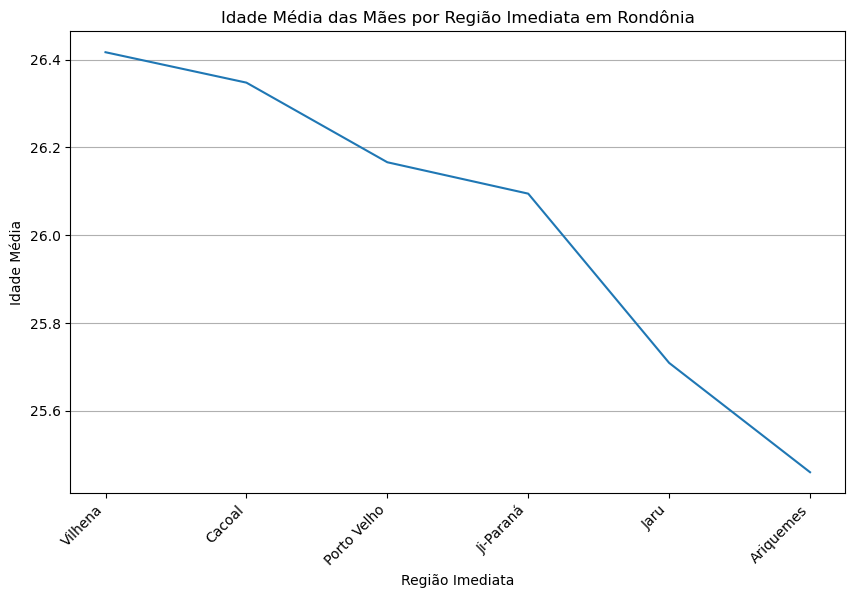

In [29]:
# Plotar a idade média das mães por região imediata
plt.figure(figsize=(10, 6))
media_idade_regiao.plot(kind='line')

plt.title('Idade Média das Mães por Região Imediata em Rondônia')
plt.xlabel('Região Imediata')
plt.ylabel('Idade Média')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [32]:
sinasc_raw[['munResNome']]

,munResNome
0,Alta Floresta D'Oeste
1,Alta Floresta D'Oeste
2,Alta Floresta D'Oeste
3,Alto Alegre dos Parecis
4,Alta Floresta D'Oeste
...,...
27023,Vilhena
27024,Chupinguaia
27025,Vilhena
27026,Vilhena


In [33]:
import pandas as pd

# Criar um DataFrame com os nomes dos municípios
municipios = sinasc_raw[['munResNome']]

# Criar um dicionário com os valores de IDH
idh = {
    "Porto Velho": "IDH alto",
    "Vilhena": "IDH médio",
    "Cacoal": "IDH baixo"
}

# Mapear os valores de IDH para cada município
municipios['IDH'] = municipios['munResNome'].map(idh)

# Agrupar os municípios pelo valor de IDH e contar as ocorrências
agrupado_idh = municipios.groupby('IDH')['munResNome'].count().reset_index()

# Renomear a coluna para 'Contagem'
agrupado_idh.columns = ['IDH', 'Contagem']

# Exibir o resultado agrupado
agrupado_idh



C:\Users\Felipe\AppData\Local\Temp\ipykernel_14456\2171456053.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  municipios['IDH'] = municipios['munResNome'].map(idh)


,IDH,Contagem
0,IDH alto,8437
1,IDH baixo,1374
2,IDH médio,1590


In [37]:
sinasc_5 = sinasc_raw[['munResNome']]

# Dicionário com os valores de IDH
idh = {
    #grupo alto
    "Porto Velho":"IDH alto",
    "Vilhena":"IDH alto",
    "Cacoal":"IDH alto",
    "Ji-Paraná":"IDH alto",
    "Pimenta Bueno":"IDH alto",
    "Ariquemes":"IDH alto",
    "Rolim de Moura":"IDH alto",

    #grupo médio
    "Cerejeiras":"IDH médio",
    "Jaru":"IDH médio",
    "Colorado do Oeste":"IDH médio",
    "Ouro Preto do Oeste":"IDH médio",
    "Espigão d'Oeste":"IDH médio",
    "Santa Luzia d'Oeste":"IDH médio",
    "Pimenteiras do Oeste":"IDH médio",
    "Presidente Médici":"IDH médio",
    "Castanheiras":"IDH médio",
    "Guajará-Mirim":"IDH médio",
    "Chupinguaia":"IDH médio",
    "Cabixi":"IDH médio",
    "Candeias do Jamari":"IDH médio",
    "São Felipe d'Oeste":"IDH médio",
    "Cacaulândia":"IDH médio",
    "São Miguel do Guaporé":"IDH médio",
    "Mirante da Serra":"IDH médio",
    "Alvorada d'Oeste":"IDH médio",
    "Teixeirópolis":"IDH médio",
    "Nova Brasilândia d'Oeste":"IDH médio",
    "Rio Crespo":"IDH médio",
    "Primavera de Rondônia":"IDH médio",
    "Alta Floresta d'Oeste":"IDH médio",
    "Ministro":"IDH médio",
    "Andreazza":"IDH médio",
    "Novo Horizonte do Oeste:":"IDH médio",
    "Vale do Paraíso":"IDH médio",
    "Alto Paraíso":"IDH médio",
    "Parecis":"IDH médio",
    "Buritis":"IDH médio",
    "Itapuã do Oeste":"IDH médio",
    "Corumbiara":"IDH médio",
    "Cujubim":"IDH médio",
    "Costa Marques":"IDH médio",
    "São Francisco do Guaporé":"IDH médio",
    "Urupá":"IDH médio",
    "Monte Negro":"IDH médio",

    #grupo baixo
    "Seringueiras":"IDH baixo",
    "Governador":"IDH baixo",
    "Jorge Teixeira":"IDH baixo",
    "Machadinho d'Oeste":"IDH baixo",
    "Campo Novo de":"IDH baixo",
    "Rondônia":"IDH baixo",
    "Alto Alegre dos Parecis":"IDH baixo",
    "Theobroma":"IDH baixo",
    "Nova União":"IDH baixo",
    "Nova Mamoré":"IDH baixo",
    "Vale do Anari":"IDH baixo",
}

# Criar um novo DataFrame com munResNome como índice
tabela_idh = sinasc_5.set_index('munResNome')

# Adicionar a nova coluna 'IDH' mapeando os valores do dicionário
tabela_idh['IDH'] = tabela_idh.index.map(idh)

# Remover valores NaN
tabela_idh = tabela_idh.dropna(subset=['IDH'])

# Agrupar os dados pelo valor de IDH e contar
contagem_idh = tabela_idh['IDH'].value_counts().reset_index()

# Renomear as colunas para a tabela final
contagem_idh.columns = ['IDH','Total de incidências']

# Exibir a tabela final
contagem_idh.groupby('IDH').sum()

# Explicação: No resultado abaixo é apresentado quantas vezes os municipios acima aparecem no dataframe Sinasc_RO_2019.

,Total de incidências
IDH,
IDH alto,16855
IDH baixo,1048
IDH médio,6728


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [42]:
sinasc_6 = sinasc_raw[['munResNome']]

idfm = {
    #IDF moderado
    "Ariquemes":"Moderado",
    "Vilhena":"Moderado",
    "Pimenta Bueno":"Moderado",
    "Porto Velho":"Moderado",
    "Ji-Paraná":"Moderado",
    "Cacoal":"Moderado",
    "Santa Luzia d'Oeste":"Moderado",
    "Rolim de Moura":"Moderado",
    "Chupinguaia":"Moderado",
    "São Miguel do Guaporé":"Moderado",
    "Pimenteiras do Oeste":"Moderado",
    "Teixeirópolis":"Moderado",
    "Colorado do Oeste":"Moderado",
    "Jaru":"Moderado",
    "Rio Crespo":"Moderado",
    "Primavera de Rondônia":"Moderado",
    "Alta Floresta d'Oeste":"Moderado",
    "Ouro Preto do Oeste":"Moderado",
    "São Francisco do Guaporé":"Moderado",
    "Candeias do Jamari":"Moderado",
    "Buritis":"Moderado",
    "São Felipe d'Oeste":"Moderado",
    "Presidente Médici":"Moderado",
    "Cerejeiras":"Moderado",
    "Monte Negro":"Moderado",
    "Urupá":"Moderado",

    #IDF regular
    "Espigão d'Oeste":"Regular",
    "Seringueiras":"Regular",
    "Alvorada d'Oeste":"Regular",
    "Itapuã do Oeste":"Regular",
    "Cabixi":"Regular",
    "Novo Horizonte do Oeste":"Regular",
    "Nova Brasilândia d'Oeste":"Regular",
    "Vale do Paraíso":"Regular",
    "Corumbiara":"Regular",
    "Alto Paraíso":"Regular",
    "Cacaulândia":"Regular",
    "Vale do Anari":"Regular",
    "Ministro Andreazza":"Regular",
    "Costa Marques":"Regular",
    "Nova União":"Regular",
    "Guajará-Mirim":"Regular",
    "Mirante da Serra":"Regular",
    "Parecis":"Regular",
    "Castanheiras":"Regular",
    "Theobroma":"Regular",
    "Machadinho d'Oeste":"Regular",
    "Campo Novo de Rondônia":"Regular",
    "Nova Mamoré":"Regular",
    "Cujubim":"Regular",
    "Alto Alegre dos Parecis":"Regular",
    "Governador Jorge Teixeira":"Regular",
}

tabela_idfm = sinasc_6.set_index('munResNome')

tabela_idfm['IDFM'] = tabela_idfm.index.map(idfm)

contagem_idfm = tabela_idfm['IDFM'].value_counts().reset_index()

contagem_idfm.columns = ['IDFM', 'Contagem'] 

contagem_idfm.groupby('IDFM').sum()

# Explicação: No resultado abaixo é apresentado quantas vezes os municipios acima aparecem no dataframe Sinasc_RO_2019.

,Contagem
IDFM,
Moderado,21426
Regular,3665


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [39]:
contagem_idh.groupby('IDH').sum()

,Total de incidências
IDH,
IDH alto,16855
IDH baixo,1048
IDH médio,6728
